# 2024 Olympics Predictor

Hi everyone, and thank you for taking the time to read this project! Like the title suggests, we are building a 2024 Olympics Predictor application. In order to do that, we are going to use the dataset from the 2021 Tokyo Olympics and perform some exploratory data analysis and figure who is gonna be our winner! 🥇

## Table of contents:
- Data Cleaning
- Feature Selection and Data Analysis
- Data Visualization
- Models Training
- Presentation of Insights

In [31]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

## Working with the 2021 Olympics Data

In [32]:
# we are going to start up uploading the different relevant dataframes related to that data
track_field_df = pd.read_csv('track_1896_2016.csv')

In [33]:
track_field_df.head()
track_field_df.describe()
track_field_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       2394 non-null   object 
 1   Event        2394 non-null   object 
 2   Location     2394 non-null   object 
 3   Year         2394 non-null   int64  
 4   Medal        2394 non-null   object 
 5   Name         2164 non-null   object 
 6   Nationality  2394 non-null   object 
 7   Result       2351 non-null   object 
 8   Wind         12 non-null     float64
dtypes: float64(1), int64(1), object(7)
memory usage: 168.5+ KB


In [34]:
# Some data points are missing namely within results and wind, so we got to clean that up.

track_field_df = track_field_df.dropna(subset=['Result']) #drop any row that has missing values
track_field_df = track_field_df.drop(columns=['Wind'])

track_field_df.info()

# the wind column is also mainly NaN, so we will just drop the column all together

# filtered_df = track_field_df.loc[track_field_df['Event'] == '10000M Men']
# filtered_df

<class 'pandas.core.frame.DataFrame'>
Index: 2351 entries, 0 to 2393
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       2351 non-null   object
 1   Event        2351 non-null   object
 2   Location     2351 non-null   object
 3   Year         2351 non-null   int64 
 4   Medal        2351 non-null   object
 5   Name         2135 non-null   object
 6   Nationality  2351 non-null   object
 7   Result       2351 non-null   object
dtypes: int64(1), object(7)
memory usage: 165.3+ KB


In [35]:
# now we are going to filter the data based off the event we are interested in
event = '10000M Men'
filtered_df = track_field_df.loc[track_field_df['Event'] == f'{event}']
filtered_df.loc[:, 'Result'] = '0:' + filtered_df['Result']
filtered_df

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,0:25:05.17
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,0:27:05.64
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,0:27:06.26
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,0:27:01.17
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,0:27:02.77
...,...,...,...,...,...,...,...,...
64,M,10000M Men,Paris,1924,S,Edvin WIDE,SWE,0:30:55.2
65,M,10000M Men,Paris,1924,B,Eero BERG,FIN,0:31:43.0
66,M,10000M Men,Stockholm,1912,G,Hannes KOLEHMAINEN,FIN,0:31:20.8
67,M,10000M Men,Stockholm,1912,S,Lewis TEWANIMA,USA,0:32:06.6


In [36]:
filtered_df['Result'] = pd.to_timedelta(filtered_df['Result'], errors='coerce')
filtered_df

/var/folders/60/2gsbpxvj6b72mtvy48svl27h0000gn/T/ipykernel_59226/2507821598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Result'] = pd.to_timedelta(filtered_df['Result'], errors='coerce')


,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,0 days 00:25:05.170000
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,0 days 00:27:05.640000
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,0 days 00:27:06.260000
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,0 days 00:27:01.170000
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,0 days 00:27:02.770000
...,...,...,...,...,...,...,...,...
64,M,10000M Men,Paris,1924,S,Edvin WIDE,SWE,0 days 00:30:55.200000
65,M,10000M Men,Paris,1924,B,Eero BERG,FIN,0 days 00:31:43
66,M,10000M Men,Stockholm,1912,G,Hannes KOLEHMAINEN,FIN,0 days 00:31:20.800000
67,M,10000M Men,Stockholm,1912,S,Lewis TEWANIMA,USA,0 days 00:32:06.600000


In [37]:
filtered_df['Result'].dtype


dtype('<m8[ns]')

In [38]:
filtered_df.loc[:, 'Result in Seconds'] = filtered_df['Result'].dt.total_seconds()
filtered_df

/var/folders/60/2gsbpxvj6b72mtvy48svl27h0000gn/T/ipykernel_59226/2515012483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Result in Seconds'] = filtered_df['Result'].dt.total_seconds()


,Gender,Event,Location,Year,Medal,Name,Nationality,Result,Result in Seconds
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,0 days 00:25:05.170000,1505.17
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,0 days 00:27:05.640000,1625.64
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,0 days 00:27:06.260000,1626.26
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,0 days 00:27:01.170000,1621.17
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,0 days 00:27:02.770000,1622.77
...,...,...,...,...,...,...,...,...,...
64,M,10000M Men,Paris,1924,S,Edvin WIDE,SWE,0 days 00:30:55.200000,1855.20
65,M,10000M Men,Paris,1924,B,Eero BERG,FIN,0 days 00:31:43,1903.00
66,M,10000M Men,Stockholm,1912,G,Hannes KOLEHMAINEN,FIN,0 days 00:31:20.800000,1880.80
67,M,10000M Men,Stockholm,1912,S,Lewis TEWANIMA,USA,0 days 00:32:06.600000,1926.60


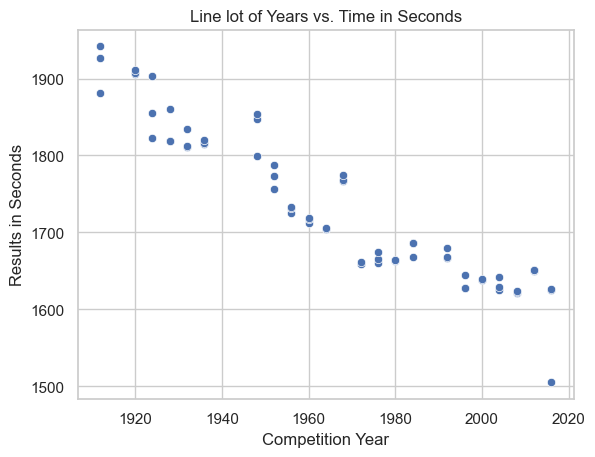

In [73]:
# let us take a look a some plot
sn.set(style="whitegrid")
sn.scatterplot(data=filtered_df, x='Year', y='Result in Seconds', marker='o')
plt.title('Line lot of Years vs. Time in Seconds')
plt.xlabel('Competition Year')
plt.ylabel('Results in Seconds')
plt.show()


In [122]:
y = filtered_df['Result in Seconds'].values
X = filtered_df['Year'].values

X = X.reshape(-1, 1)




# we are going to start by linear regression analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB



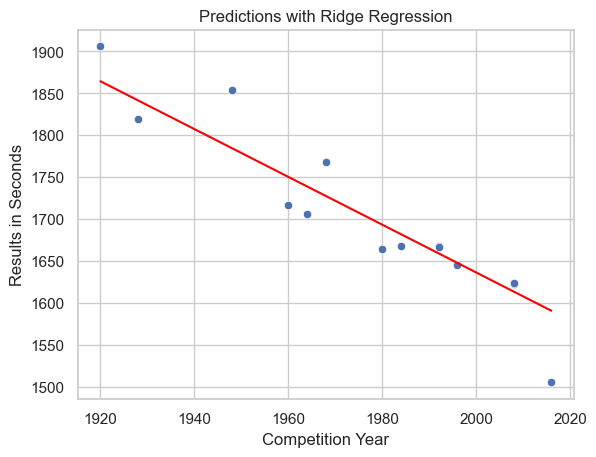

Ridge()

In [123]:




#we are using a 20/80 partition for training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Using Linear Regression for the prediction
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

sn.set(style="whitegrid")
sn.scatterplot(x=x_test.flatten(), y=y_test, marker='o')
sn.lineplot(x=x_test.flatten(), y=predictions, color='red')
plt.title('Predictions with Ridge Regression')
plt.xlabel('Competition Year')
plt.ylabel('Results in Seconds')
plt.show()


#we are going to use standard scaler to improve convergence and regularization
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

# reshaped_x_train = x_train.reshape(-1, 1)
# reshaped_x_test = x_test.reshape(-1, 1)
# model = LinearRegression()
model = Ridge(alpha=1.0)
model.fit(x_train_poly, y_train)

[ 0.         -0.14897666 -0.15675748  0.          1.64339882  1.65698464
  0.          0.49115744  0.48514249  0.          1.38734518  1.39475059
  0.         -0.02094984 -0.02889883  0.          0.10707698  0.0992205
  0.          0.8752379   0.87341051  0.         -1.42924486 -1.42100717
  0.          1.00326472  1.00335452  0.          0.61918426  0.61430449
  0.         -1.17319122 -1.17024259  0.          0.8752379   0.87341051
  0.         -0.53305712 -0.53876942  0.          1.38734518  1.39475059]


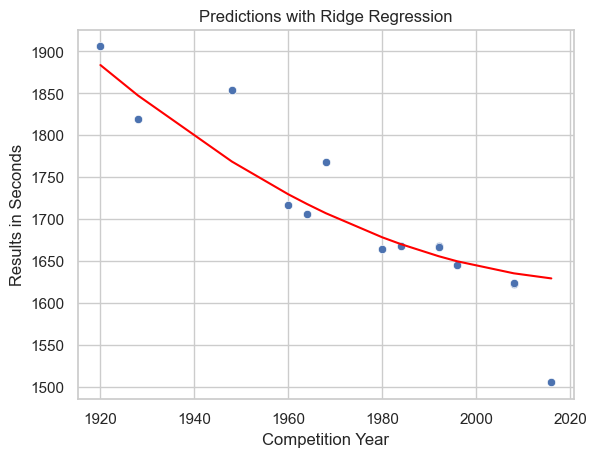

In [110]:
predictions = model.predict(x_test_poly)



print(x_test_flat)
# print(predictions)

sn.set(style="whitegrid")
sn.scatterplot(x=x_test.flatten(), y=y_test, marker='o')
sn.lineplot(x=x_test.flatten(), y=predictions, color='red')
plt.title('Predictions with Ridge Regression')
plt.xlabel('Competition Year')
plt.ylabel('Results in Seconds')
plt.show()

## Now We are going to be using more features and use a decision tree